<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("new_file.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14678 entries, 0 to 14677
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14678 non-null  int64  
 1   type            14678 non-null  object 
 2   amount          14678 non-null  float64
 3   nameOrig        14678 non-null  object 
 4   oldbalanceOrg   14678 non-null  float64
 5   newbalanceOrig  14678 non-null  float64
 6   nameDest        14678 non-null  object 
 7   oldbalanceDest  14677 non-null  float64
 8   newbalanceDest  14677 non-null  float64
 9   isFraud         14677 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,14678.000000,1.467800e+04,1.467800e+04,1.467800e+04,1.467700e+04,1.467700e+04,14677.000000
mean,5.124131,1.134950e+05,7.730090e+05,7.892850e+05,8.375732e+05,1.154218e+06,0.005314
std,2.477697,2.824927e+05,1.990700e+06,2.033458e+06,2.527107e+06,3.164173e+06,0.072709
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.643157e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,7.000000,1.302046e+04,2.031350e+04,7.892540e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.238770e+05,1.336342e+05,1.263603e+05,2.617836e+05,2.830472e+05,0.000000
max,8.000000,1.000000e+07,1.293042e+07,1.301050e+07,2.093759e+07,2.533027e+07,1.000000


In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 6


<Axes: xlabel='type', ylabel='count'>

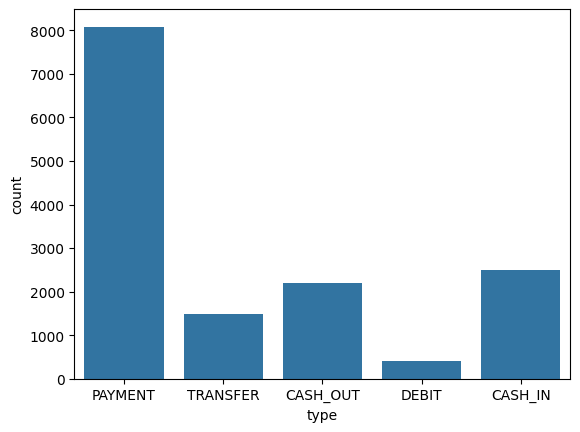

In [6]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

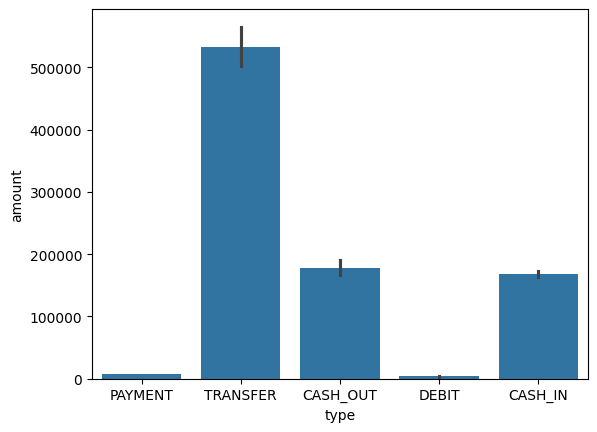

In [7]:
sns.barplot(x='type', y='amount', data=data)


In [8]:
data['isFraud'].value_counts()


,count
isFraud,
0.0,14599
1.0,78


<ipython-input-9-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

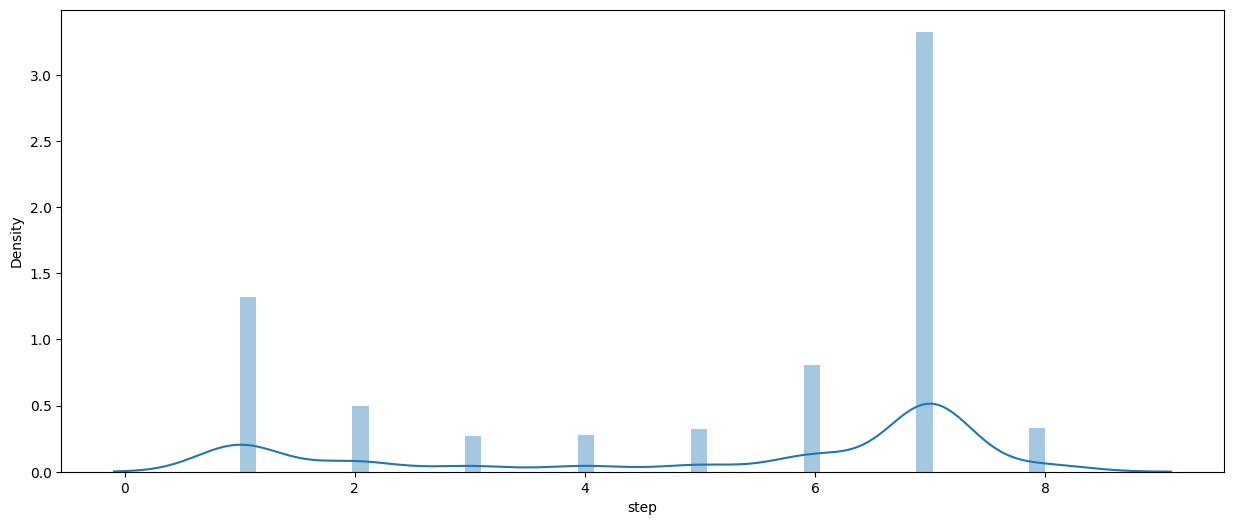

In [9]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<Axes: >

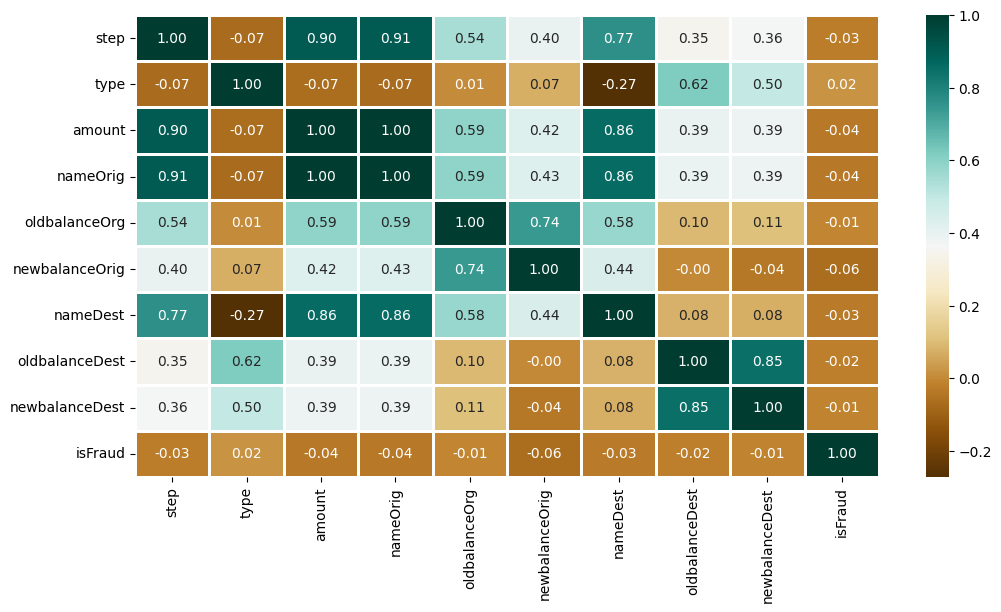

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


In [11]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,False,False,True,False


In [12]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [13]:
X.shape, y.shape


((14678, 10), (14678,))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [27]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

models = [LogisticRegression(),
          XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])

if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train, name='isFraud')
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test, name='isFraud')


for i in range(len(models)):

    train_data = pd.concat([X_train, y_train], axis=1).dropna()
    X_train_clean = train_data.drop(columns=['isFraud'])
    y_train_clean = train_data['isFraud']


    models[i].fit(X_train_clean, y_train_clean)
    print(f'{models[i]} : ')


    train_preds = models[i].predict_proba(X_train_clean)[:, 1]
    print('Training AUC Score: ', roc_auc_score(y_train_clean, train_preds))

    test_data = pd.concat([X_test, y_test], axis=1).dropna()
    X_test_clean = test_data.drop(columns=['isFraud'])
    y_test_clean = test_data['isFraud']

    y_preds = models[i].predict_proba(X_test_clean)[:, 1]
    print('Validation AUC Score: ', roc_auc_score(y_test_clean, y_preds))
    print()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training AUC Score:  0.48871372486766024
Validation AUC Score:  0.611148970969061

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training AUC Score:  0.999430649090565
Validation AUC Score:  0.452637317704784

RandomForestClassifier(criterion='entropy', n_estim

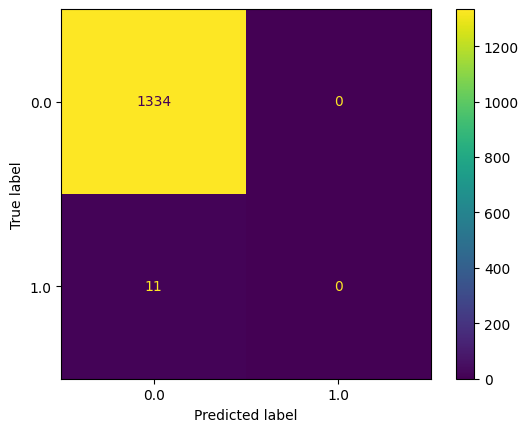

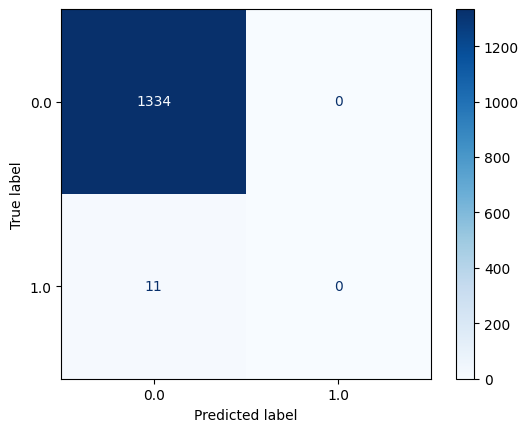

In [29]:
test_data = pd.concat([X_test, y_test], axis=1).dropna()

X_test_clean = test_data.drop(columns=['isFraud'])
y_test_clean = test_data['isFraud']

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test_clean, y_test_clean)
cm.plot(cmap='Blues')
plt.show()
